# Healthcare EDA and Model Building

In [1]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/healthcare_dataset.csv')

In [3]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


### Understanding the Data

In [4]:
print(f"There is {df.shape[0]} rows and {df.shape[1]} columns!")

There is 55500 rows and 15 columns!


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [6]:
df.isna().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [7]:
df.duplicated().sum()

534

In [8]:
df.nunique()

Name                  49992
Age                      77
Gender                    2
Blood Type                8
Medical Condition         6
Date of Admission      1827
Doctor                40341
Hospital              39876
Insurance Provider        5
Billing Amount        50000
Room Number             400
Admission Type            3
Discharge Date         1856
Medication                5
Test Results              3
dtype: int64

In [9]:
df.drop_duplicates(inplace=True)

### EDA

#### Univariate Analysis

**Patient Name**

In [10]:
df['Name'].value_counts()

Name
DAvId muNoZ          3
kaTheRIne WeBSTer    2
mICHael aNdERSon     2
DaVID caLhouN        2
MELiSsA COloN        2
                    ..
dUstin blaCKwELl     1
MARc CLaRK           1
sTEphen AyaLa        1
ThOMaS torreS        1
HARoLD ACOSTa        1
Name: count, Length: 49992, dtype: int64

In [11]:
df['Name'] = df['Name'].str.lower()

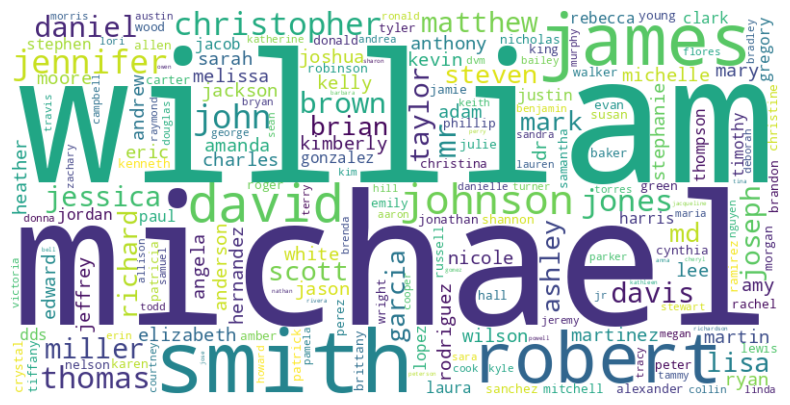

In [12]:
text = ' '.join(df['Name'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

As you can see the name Michael, Willian, Smith, James, Robert, David are more prominent than others.

**Age**

In [13]:
df['Age']

0        30
1        62
2        76
3        28
4        43
         ..
55495    42
55496    61
55497    38
55498    43
55499    53
Name: Age, Length: 54966, dtype: int64

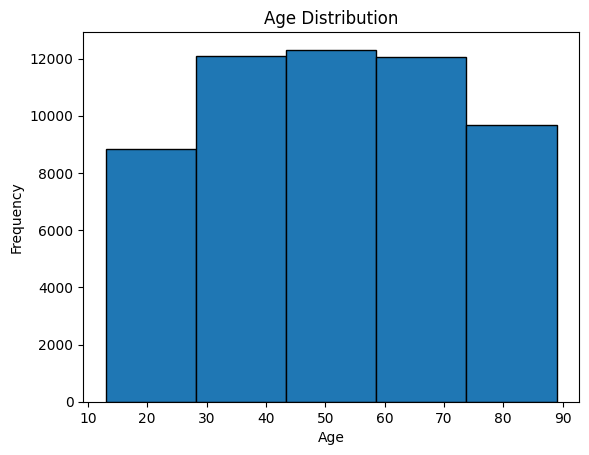

In [14]:
plt.hist(df['Age'], bins=5, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show();

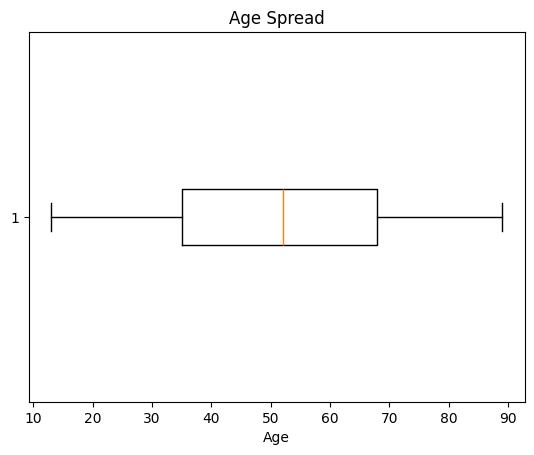

In [15]:
plt.boxplot(df['Age'], vert=False)
plt.title('Age Spread')
plt.xlabel('Age')
plt.show();

As observed, individuals aged between 30 and 70 are more likely to visit the hospital for check-ups compared to other age groups.

**Gender**

In [16]:
df['Gender'].value_counts()

Gender
Male      27496
Female    27470
Name: count, dtype: int64

In [17]:
df['Gender'] = df['Gender'].astype('category')

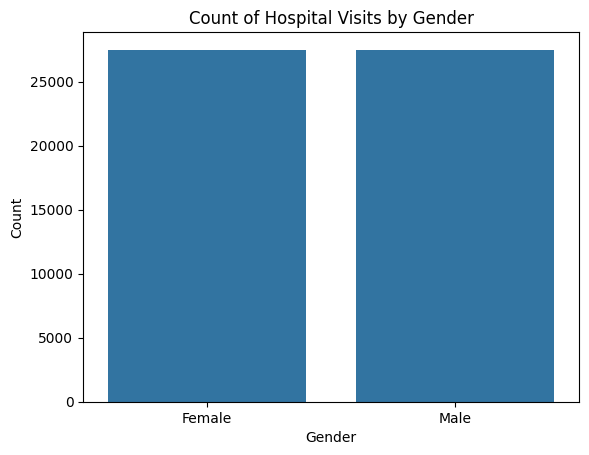

In [18]:
sns.countplot(x='Gender', data=df)

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Hospital Visits by Gender')
plt.show();

As we can see both gender have equal distribution.

**Blood Type**

In [19]:
df['Blood Type'].value_counts()

Blood Type
A-     6898
A+     6896
B+     6885
AB+    6882
AB-    6874
B-     6872
O+     6855
O-     6804
Name: count, dtype: int64

In [20]:
df['Blood Type'] = df['Blood Type'].astype('category')

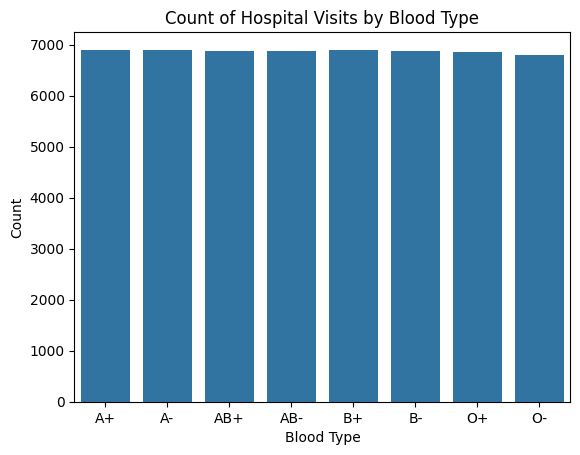

In [21]:
sns.countplot(x='Blood Type', data=df)

plt.xlabel('Blood Type')
plt.ylabel('Count')
plt.title('Count of Hospital Visits by Blood Type')
plt.show();

**Medical Condition**

In [22]:
df['Medical Condition'].value_counts()

Medical Condition
Arthritis       9218
Diabetes        9216
Hypertension    9151
Obesity         9146
Cancer          9140
Asthma          9095
Name: count, dtype: int64

In [23]:
df['Medical Condition'] = df['Medical Condition'].astype('category')

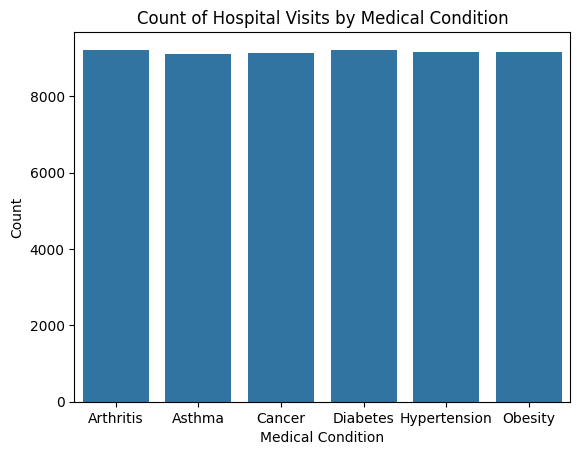

In [24]:
sns.countplot(x='Medical Condition', data=df)

plt.xlabel('Medical Condition')
plt.ylabel('Count')
plt.title('Count of Hospital Visits by Medical Condition')
plt.show();

**Doctor**

In [25]:
df['Doctor'].value_counts()

Doctor
Michael Smith      27
John Smith         22
Robert Smith       21
James Smith        20
Michael Johnson    20
                   ..
Shane Tate          1
Christy Parker      1
Larry Miller        1
Chelsea Neal        1
Jeffrey Moore       1
Name: count, Length: 40341, dtype: int64

In [26]:
df['Doctor'] = df['Doctor'].str.lower()

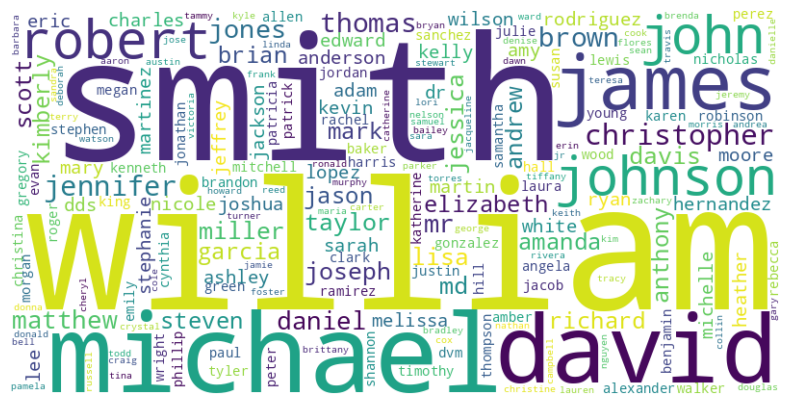

In [27]:
text = ' '.join(df['Doctor'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Hospital**

In [28]:
df['Hospital'].value_counts()

Hospital
LLC Smith                       44
Ltd Smith                       39
Johnson PLC                     37
Smith Ltd                       37
Smith Group                     36
                                ..
PLC Navarro                      1
PLC Mcintosh                     1
and Hernandez, Hughes Walton     1
Myers-Williams                   1
Moreno Murphy, Griffith and      1
Name: count, Length: 39876, dtype: int64

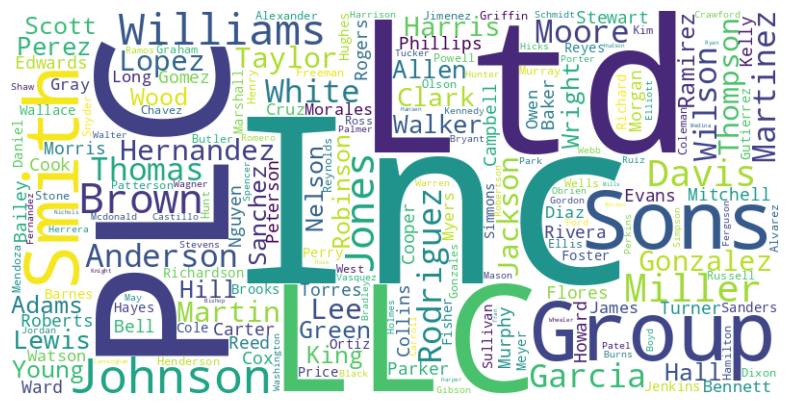

In [29]:
text = ' '.join(df['Hospital'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Insurance Provider**

In [30]:
df['Insurance Provider'].value_counts()

Insurance Provider
Cigna               11139
Medicare            11039
UnitedHealthcare    11014
Blue Cross          10952
Aetna               10822
Name: count, dtype: int64

In [31]:
df['Insurance Provider'] = df['Insurance Provider'].astype('category')

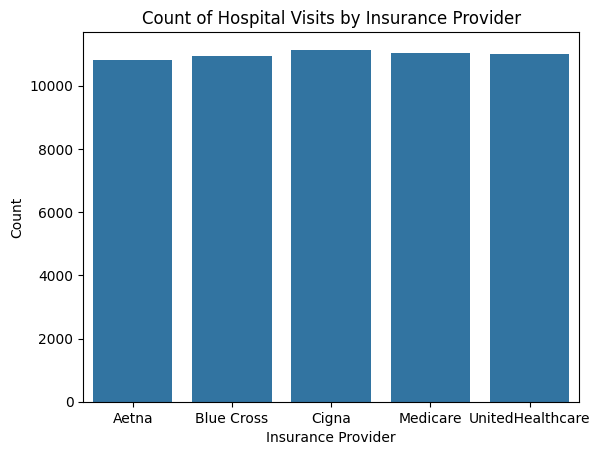

In [32]:
sns.countplot(x='Insurance Provider', data=df)

plt.xlabel('Insurance Provider')
plt.ylabel('Count')
plt.title('Count of Hospital Visits by Insurance Provider')
plt.show();

**Billing Amount**

In [33]:
df['Billing Amount'].value_counts()

Billing Amount
8926.285937     2
8693.755844     2
17889.765079    2
30679.871088    2
1709.059684     2
               ..
46506.415756    1
5343.806298     1
17180.108948    1
47078.702712    1
40116.177618    1
Name: count, Length: 50000, dtype: int64

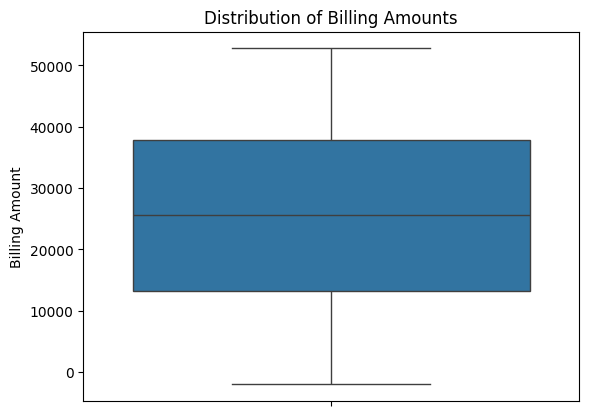

In [34]:
sns.boxplot(y='Billing Amount', data=df)
plt.title('Distribution of Billing Amounts')
plt.show()

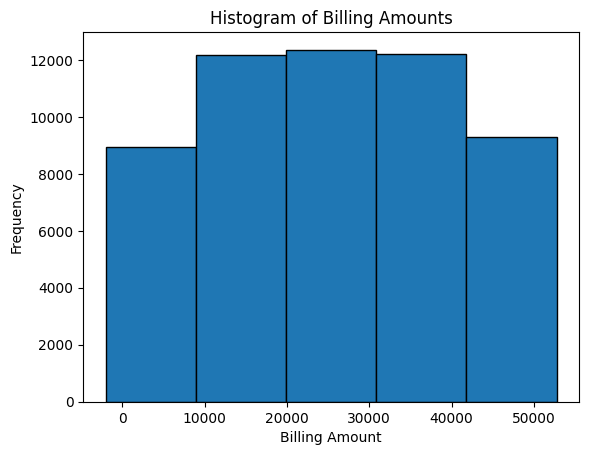

In [35]:
plt.hist(df['Billing Amount'], bins=5, edgecolor='black')
plt.xlabel('Billing Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Billing Amounts')
plt.show()

**Room Number**

In [36]:
df['Room Number'].value_counts()

Room Number
393    176
104    174
420    174
491    173
209    170
      ... 
189    112
257    111
381    110
254    108
398    108
Name: count, Length: 400, dtype: int64

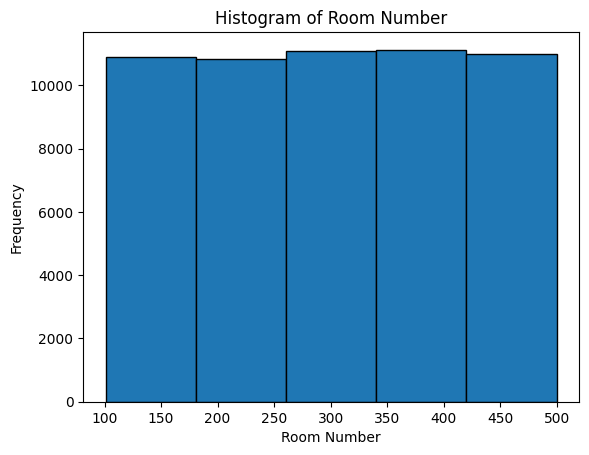

In [37]:
plt.hist(df['Room Number'], bins=5, edgecolor='black')
plt.xlabel('Room Number')
plt.ylabel('Frequency')
plt.title('Histogram of Room Number')
plt.show()

**Admission Type**

In [38]:
df['Admission Type'].value_counts()

Admission Type
Elective     18473
Urgent       18391
Emergency    18102
Name: count, dtype: int64

In [39]:
df['Admission Type'] = df['Admission Type'].astype('category')

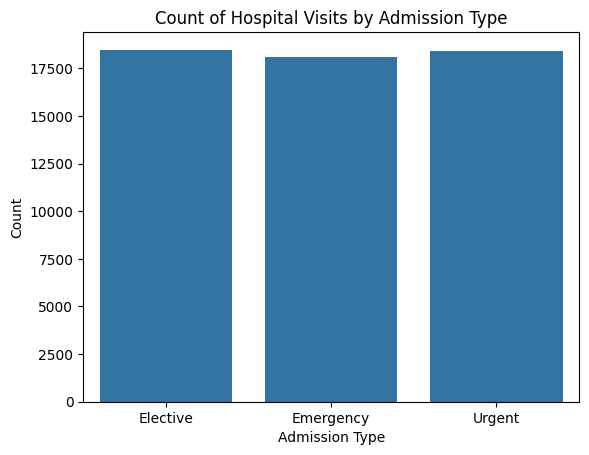

In [40]:
sns.countplot(x='Admission Type', data=df)

plt.xlabel('Admission Type')
plt.ylabel('Count')
plt.title('Count of Hospital Visits by Admission Type')
plt.show();

**Medication**

In [41]:
df['Medication'].value_counts()

Medication
Lipitor        11038
Ibuprofen      11023
Aspirin        10984
Paracetamol    10965
Penicillin     10956
Name: count, dtype: int64

In [42]:
df['Medication'] = df['Medication'].astype('category')

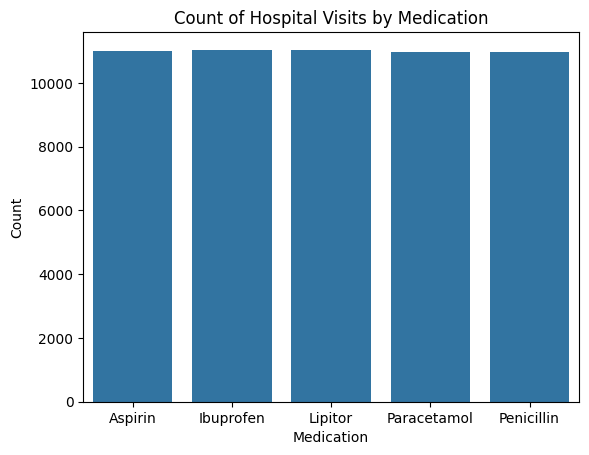

In [43]:
sns.countplot(x='Medication', data=df)

plt.xlabel('Medication')
plt.ylabel('Count')
plt.title('Count of Hospital Visits by Medication')
plt.show();

**Test Result**

In [44]:
df['Test Results'].value_counts()

Test Results
Abnormal        18437
Normal          18331
Inconclusive    18198
Name: count, dtype: int64

In [45]:
df['Test Results'] = df['Test Results'].astype('category')

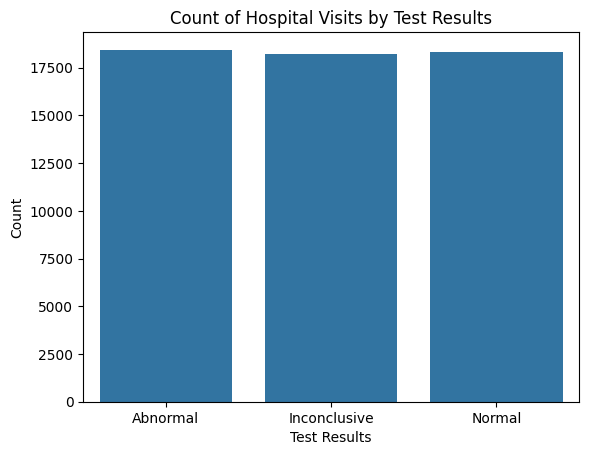

In [46]:
sns.countplot(x='Test Results', data=df)

plt.xlabel('Test Results')
plt.ylabel('Count')
plt.title('Count of Hospital Visits by Test Results')
plt.show();

### Bivariate Analysis

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54966 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Name                54966 non-null  object  
 1   Age                 54966 non-null  int64   
 2   Gender              54966 non-null  category
 3   Blood Type          54966 non-null  category
 4   Medical Condition   54966 non-null  category
 5   Date of Admission   54966 non-null  object  
 6   Doctor              54966 non-null  object  
 7   Hospital            54966 non-null  object  
 8   Insurance Provider  54966 non-null  category
 9   Billing Amount      54966 non-null  float64 
 10  Room Number         54966 non-null  int64   
 11  Admission Type      54966 non-null  category
 12  Discharge Date      54966 non-null  object  
 13  Medication          54966 non-null  category
 14  Test Results        54966 non-null  category
dtypes: category(7), float64(1), int64(2), obj

C:\Users\vohoa\AppData\Local\Temp\ipykernel_18800\2157599970.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette=pastel_palette)
C:\Users\vohoa\AppData\Local\Temp\ipykernel_18800\2157599970.py:8: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.countplot(data=df, x=col, palette=pastel_palette)


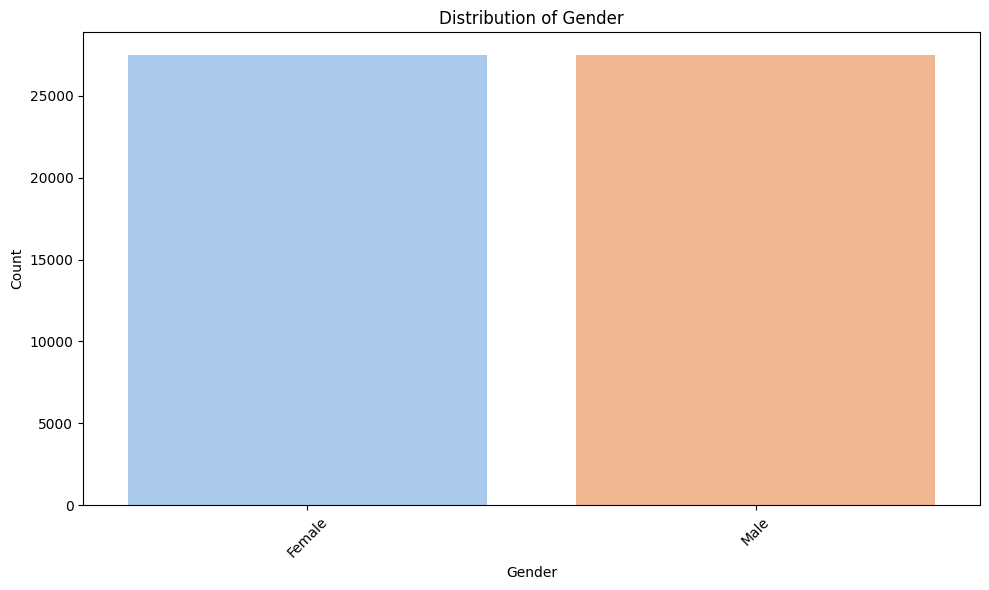

C:\Users\vohoa\AppData\Local\Temp\ipykernel_18800\2157599970.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette=pastel_palette)
C:\Users\vohoa\AppData\Local\Temp\ipykernel_18800\2157599970.py:8: UserWarning: 
The palette list has fewer values (7) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df, x=col, palette=pastel_palette)


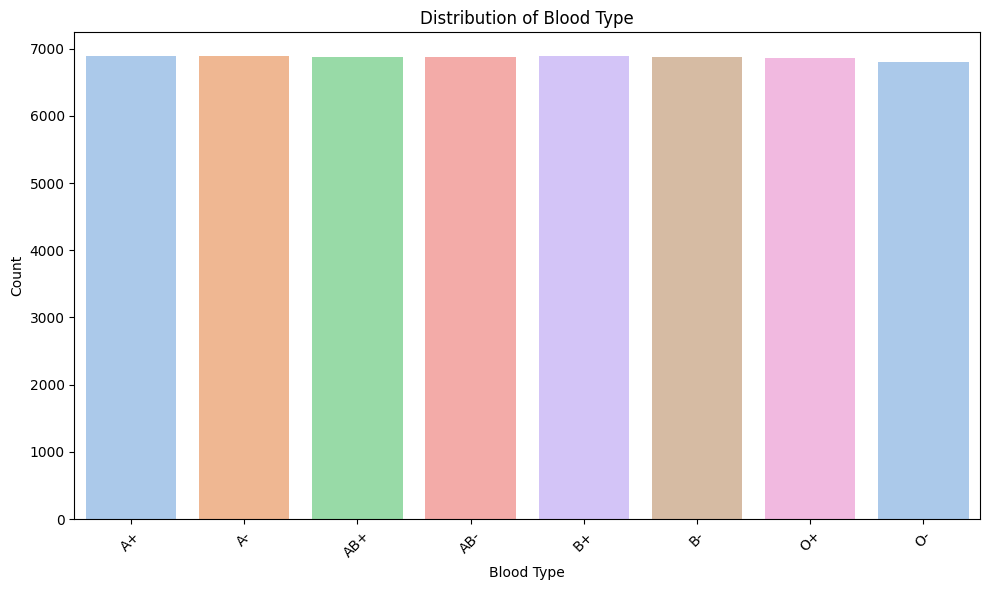

C:\Users\vohoa\AppData\Local\Temp\ipykernel_18800\2157599970.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette=pastel_palette)
C:\Users\vohoa\AppData\Local\Temp\ipykernel_18800\2157599970.py:8: UserWarning: The palette list has more values (7) than needed (6), which may not be intended.
  sns.countplot(data=df, x=col, palette=pastel_palette)


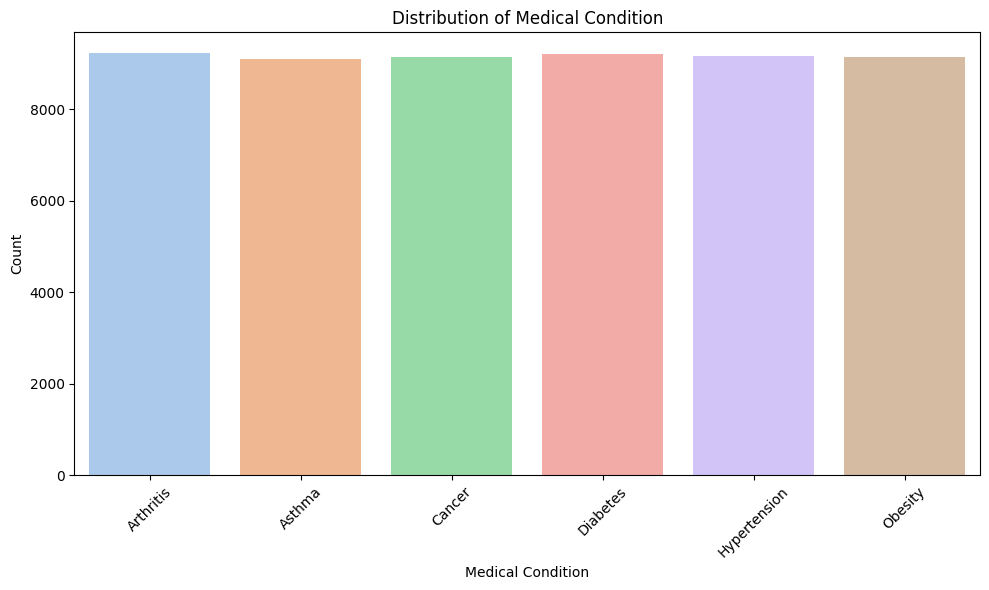

C:\Users\vohoa\AppData\Local\Temp\ipykernel_18800\2157599970.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette=pastel_palette)
C:\Users\vohoa\AppData\Local\Temp\ipykernel_18800\2157599970.py:8: UserWarning: The palette list has more values (7) than needed (3), which may not be intended.
  sns.countplot(data=df, x=col, palette=pastel_palette)


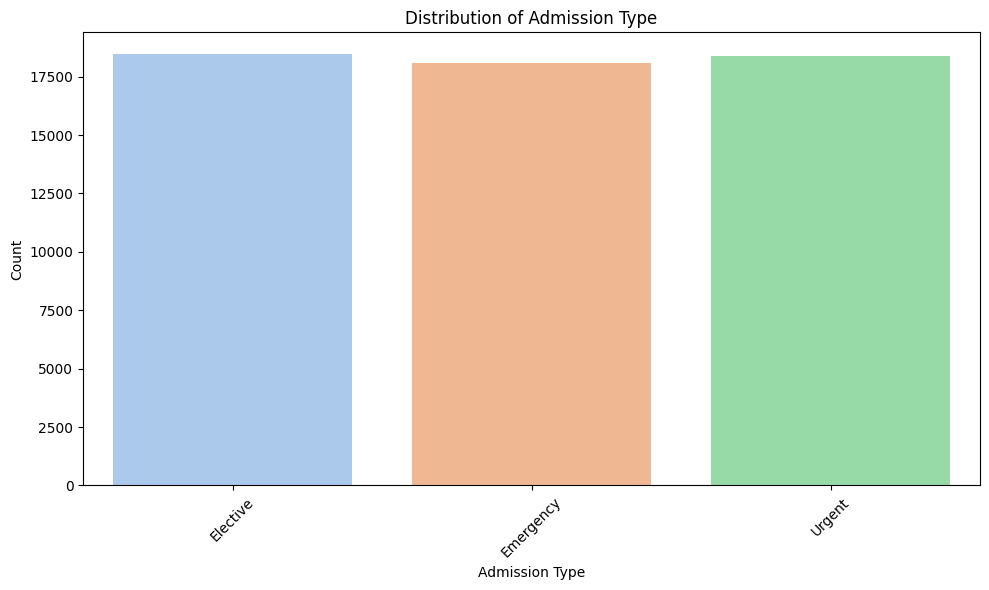

C:\Users\vohoa\AppData\Local\Temp\ipykernel_18800\2157599970.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette=pastel_palette)
C:\Users\vohoa\AppData\Local\Temp\ipykernel_18800\2157599970.py:8: UserWarning: The palette list has more values (7) than needed (5), which may not be intended.
  sns.countplot(data=df, x=col, palette=pastel_palette)


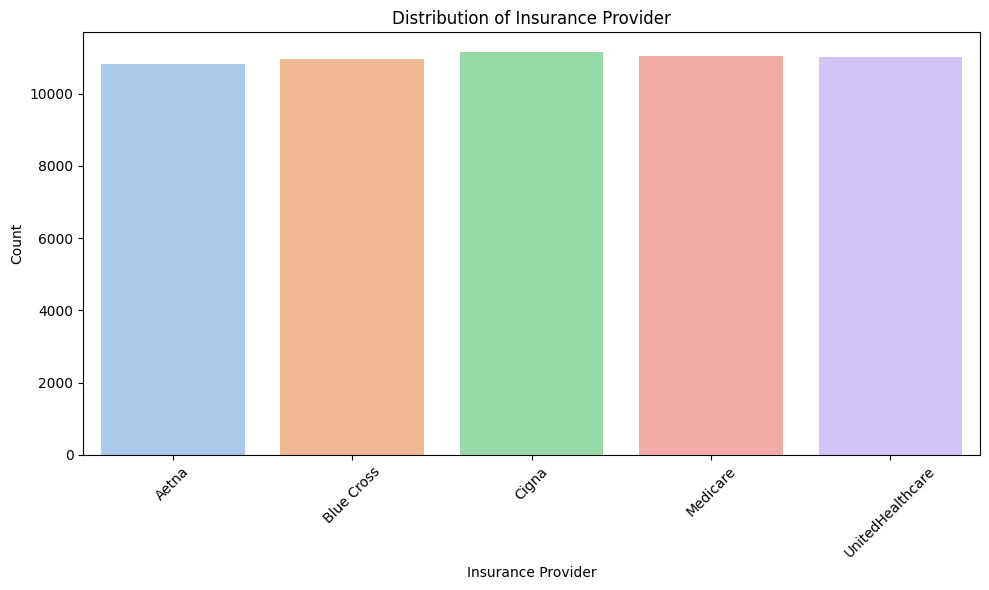

C:\Users\vohoa\AppData\Local\Temp\ipykernel_18800\2157599970.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette=pastel_palette)
C:\Users\vohoa\AppData\Local\Temp\ipykernel_18800\2157599970.py:8: UserWarning: The palette list has more values (7) than needed (5), which may not be intended.
  sns.countplot(data=df, x=col, palette=pastel_palette)


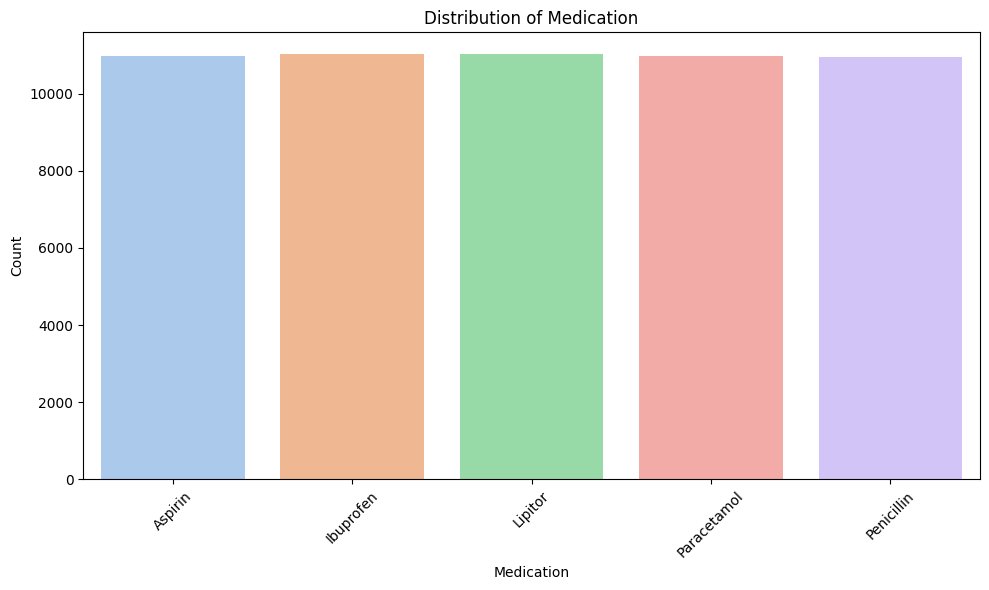

C:\Users\vohoa\AppData\Local\Temp\ipykernel_18800\2157599970.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette=pastel_palette)
C:\Users\vohoa\AppData\Local\Temp\ipykernel_18800\2157599970.py:8: UserWarning: The palette list has more values (7) than needed (3), which may not be intended.
  sns.countplot(data=df, x=col, palette=pastel_palette)


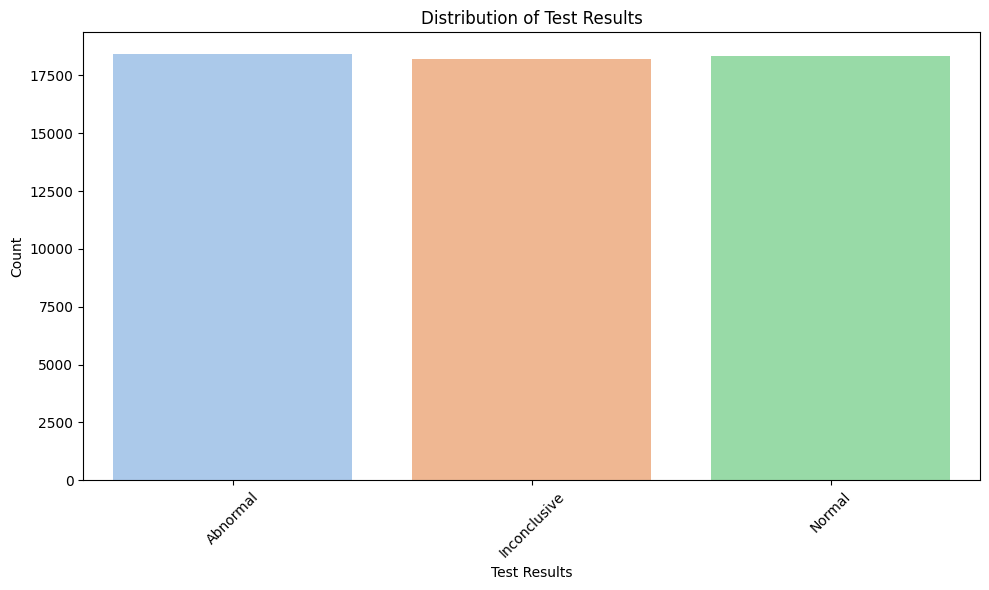

In [48]:
object_columns = ['Gender', 'Blood Type', 'Medical Condition', 'Admission Type', 
                  'Insurance Provider', "Medication", 'Test Results']

pastel_palette = sns.color_palette("pastel", len(object_columns))

for col in object_columns:
    plt.figure(figsize=(10, 6))  # Set figure size
    sns.countplot(data=df, x=col, palette=pastel_palette)
    
    # Add title and labels
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    
    # Show the plot
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to fit labels
    plt.show();

C:\Users\vohoa\AppData\Local\Temp\ipykernel_18800\879824802.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_by_condition = df.groupby('Medical Condition')['Age'].mean().reset_index()
C:\Users\vohoa\AppData\Local\Temp\ipykernel_18800\879824802.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_by_condition, x='Medical Condition', y='Age', palette=pastel_palette)
C:\Users\vohoa\AppData\Local\Temp\ipykernel_18800\879824802.py:5: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.barplot(data=age_by_condition, x='Medical Condition', y='Age', palette=pastel_palette)


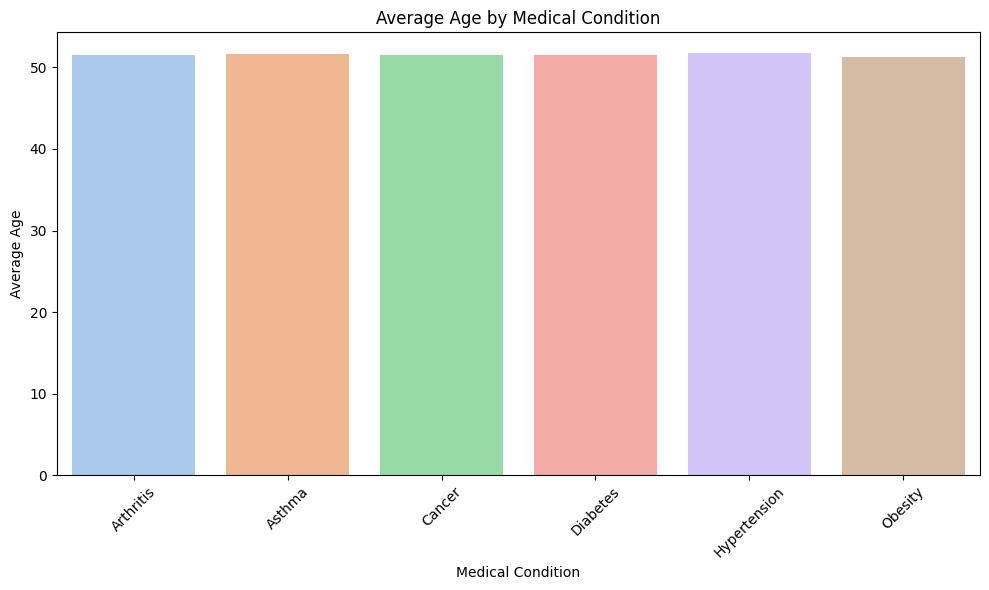

In [49]:
age_by_condition = df.groupby('Medical Condition')['Age'].mean().reset_index()

pastel_palette = sns.color_palette("pastel")
plt.figure(figsize=(10, 6))  # Adjust the figure size
sns.barplot(data=age_by_condition, x='Medical Condition', y='Age', palette=pastel_palette)

plt.title('Average Age by Medical Condition')
plt.xlabel('Medical Condition')
plt.ylabel('Average Age')

plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

C:\Users\vohoa\AppData\Local\Temp\ipykernel_18800\618768166.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df.groupby(['Medical Condition', 'Medication']).size().reset_index(name='Count')
C:\Users\vohoa\AppData\Local\Temp\ipykernel_18800\618768166.py:6: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.barplot(data=grouped_df, x='Medical Condition', y='Count', hue='Medication', palette=pastel_palette)


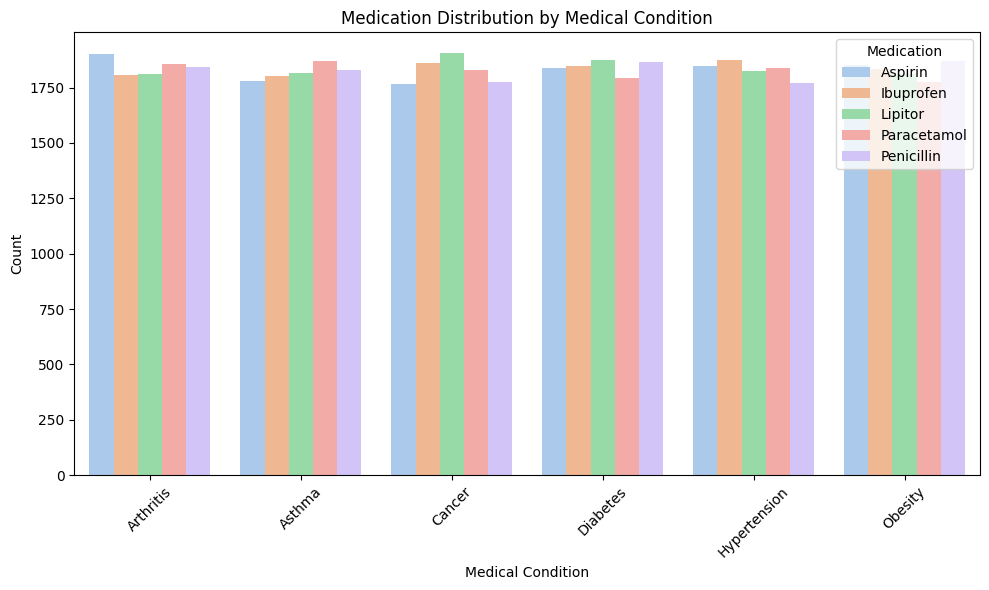

In [50]:
grouped_df = df.groupby(['Medical Condition', 'Medication']).size().reset_index(name='Count')

pastel_palette = sns.color_palette("pastel")

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_df, x='Medical Condition', y='Count', hue='Medication', palette=pastel_palette)

plt.title('Medication Distribution by Medical Condition')
plt.xlabel('Medical Condition')
plt.ylabel('Count')

plt.xticks(rotation=45) 
plt.legend(title='Medication')  
plt.tight_layout() 
plt.show()

C:\Users\vohoa\AppData\Local\Temp\ipykernel_18800\1692786542.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sex_by_condition = df.groupby(['Medical Condition', 'Gender']).size().reset_index(name='Count')
C:\Users\vohoa\AppData\Local\Temp\ipykernel_18800\1692786542.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data=sex_by_condition, x='Medical Condition', y='Count', hue='Gender', palette=pastel_palette)


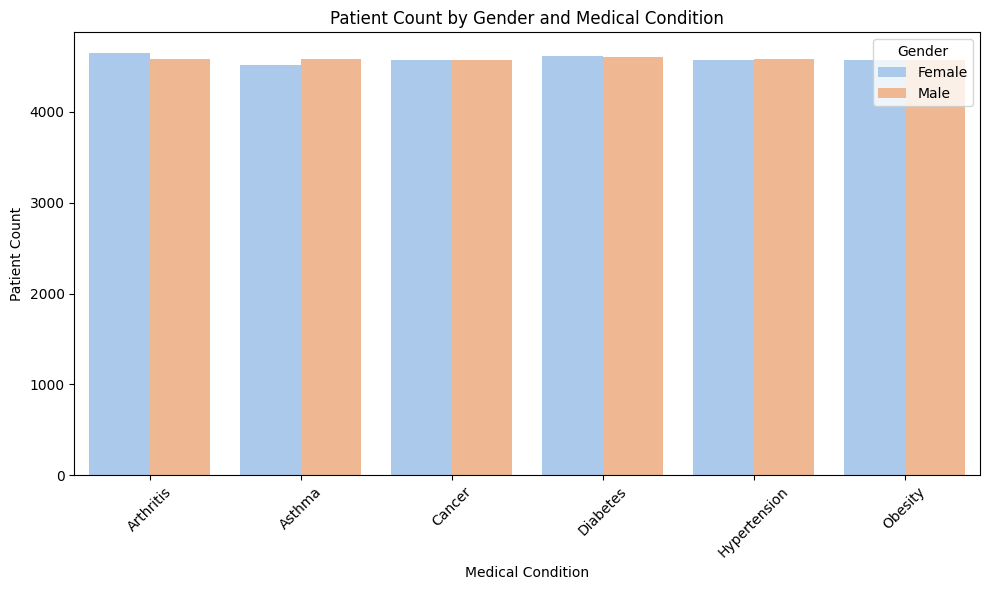

In [51]:
sex_by_condition = df.groupby(['Medical Condition', 'Gender']).size().reset_index(name='Count')

pastel_palette = sns.color_palette("pastel")

plt.figure(figsize=(10, 6))
sns.barplot(data=sex_by_condition, x='Medical Condition', y='Count', hue='Gender', palette=pastel_palette)

plt.title('Patient Count by Gender and Medical Condition')
plt.xlabel('Medical Condition')
plt.ylabel('Patient Count')

plt.legend(title='Gender')

plt.xticks(rotation=45)
plt.tight_layout()

plt.show();

C:\Users\vohoa\AppData\Local\Temp\ipykernel_18800\4014862213.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df.groupby(['Blood Type', 'Medical Condition']).size().reset_index(name='Count')
C:\Users\vohoa\AppData\Local\Temp\ipykernel_18800\4014862213.py:6: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.barplot(data=grouped_df, x='Blood Type', y='Count', hue='Medical Condition', palette=pastel_palette)


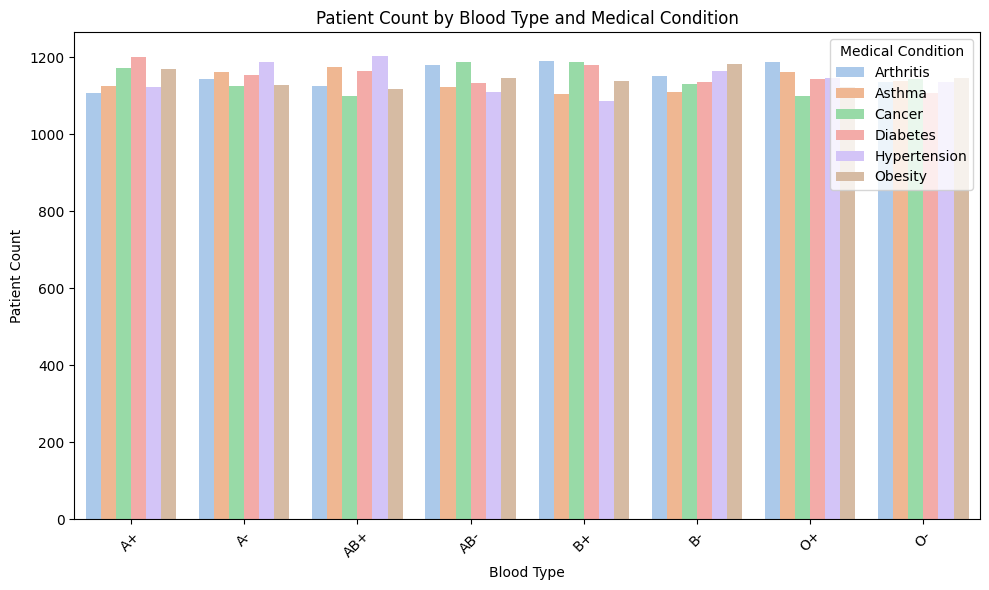

In [52]:
grouped_df = df.groupby(['Blood Type', 'Medical Condition']).size().reset_index(name='Count')

pastel_palette = sns.color_palette("pastel")

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_df, x='Blood Type', y='Count', hue='Medical Condition', palette=pastel_palette)

plt.title('Patient Count by Blood Type and Medical Condition')
plt.xlabel('Blood Type')
plt.ylabel('Patient Count')

plt.legend(title='Medical Condition')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\vohoa\AppData\Local\Temp\ipykernel_18800\3881634110.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df.groupby(['Blood Type', 'Gender']).size().reset_index(name='Count')
C:\Users\vohoa\AppData\Local\Temp\ipykernel_18800\3881634110.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data=grouped_df, x='Blood Type', y='Count', hue='Gender', palette=pastel_palette)


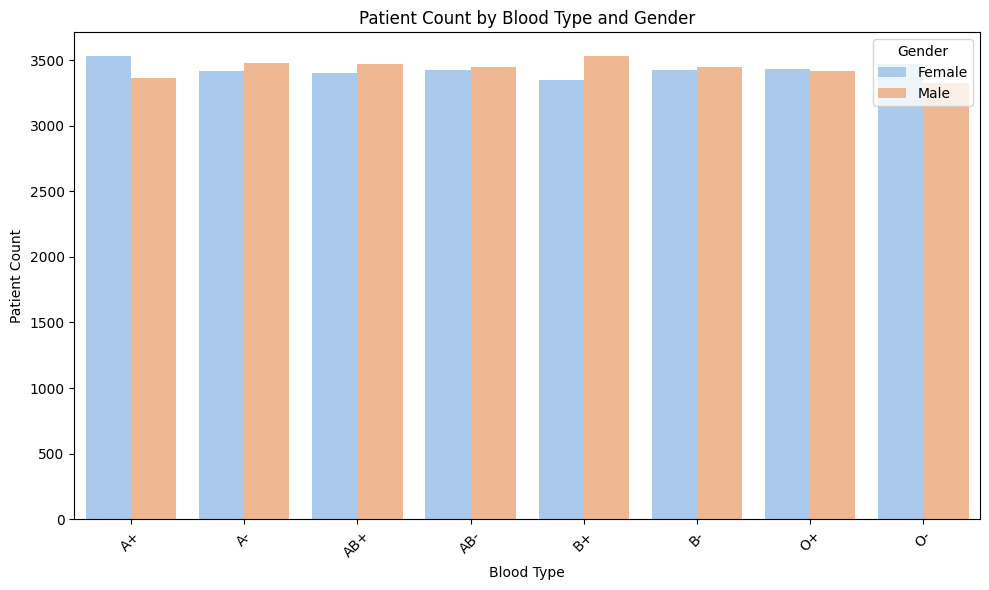

In [53]:
grouped_df = df.groupby(['Blood Type', 'Gender']).size().reset_index(name='Count')

pastel_palette = sns.color_palette("pastel")

plt.figure(figsize=(10, 6))  # Adjust figure size
sns.barplot(data=grouped_df, x='Blood Type', y='Count', hue='Gender', palette=pastel_palette)

plt.title('Patient Count by Blood Type and Gender')
plt.xlabel('Blood Type')
plt.ylabel('Patient Count')

plt.legend(title='Gender')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\vohoa\AppData\Local\Temp\ipykernel_18800\445316513.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df.groupby(['Admission Type', 'Gender']).size().reset_index(name='Count')
C:\Users\vohoa\AppData\Local\Temp\ipykernel_18800\445316513.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data=grouped_df, x='Admission Type', y='Count', hue='Gender', palette=pastel_palette)


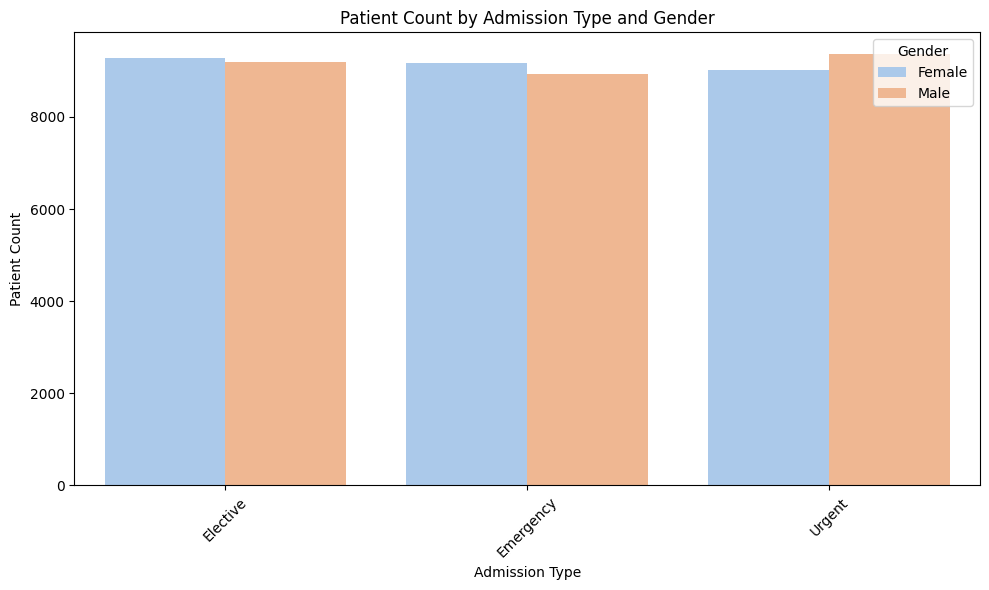

In [54]:
grouped_df = df.groupby(['Admission Type', 'Gender']).size().reset_index(name='Count')

pastel_palette = sns.color_palette("pastel")

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_df, x='Admission Type', y='Count', hue='Gender', palette=pastel_palette)

plt.title('Patient Count by Admission Type and Gender')
plt.xlabel('Admission Type')
plt.ylabel('Patient Count')

plt.legend(title='Gender')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\vohoa\AppData\Local\Temp\ipykernel_18800\3218401344.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df.groupby(['Admission Type', 'Medical Condition']).size().reset_index(name='Count')
C:\Users\vohoa\AppData\Local\Temp\ipykernel_18800\3218401344.py:6: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.barplot(data=grouped_df, x='Admission Type', y='Count', hue='Medical Condition', palette=pastel_palette)


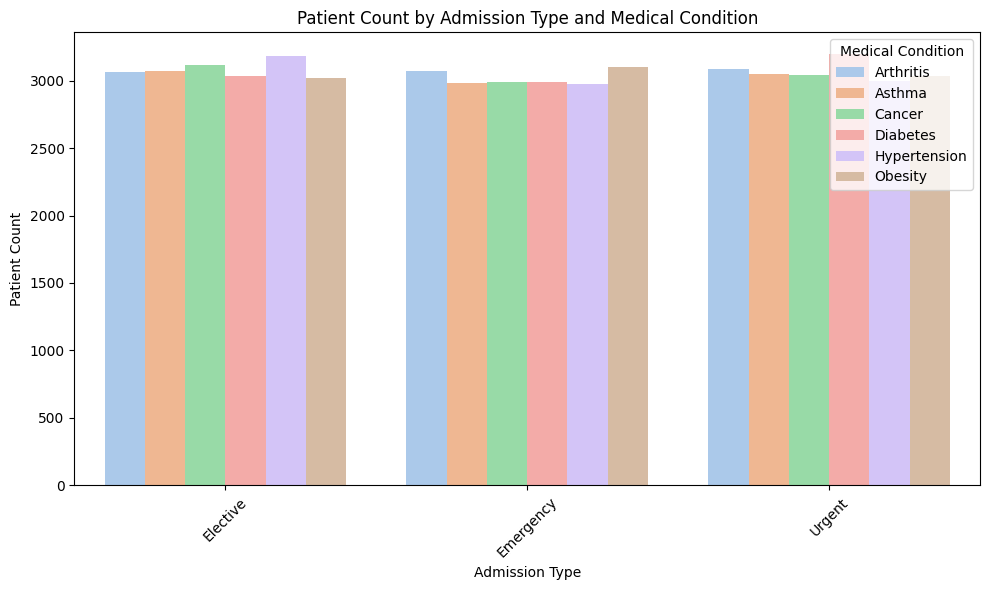

In [55]:
grouped_df = df.groupby(['Admission Type', 'Medical Condition']).size().reset_index(name='Count')

pastel_palette = sns.color_palette("pastel")

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_df, x='Admission Type', y='Count', hue='Medical Condition', palette=pastel_palette)

plt.title('Patient Count by Admission Type and Medical Condition')
plt.xlabel('Admission Type')
plt.ylabel('Patient Count')

plt.legend(title='Medical Condition')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\vohoa\AppData\Local\Temp\ipykernel_18800\3755838109.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df.groupby(['Test Results', 'Admission Type']).size().reset_index(name='Count')
C:\Users\vohoa\AppData\Local\Temp\ipykernel_18800\3755838109.py:6: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.barplot(data=grouped_df, x='Test Results', y='Count', hue='Admission Type', palette=pastel_palette)


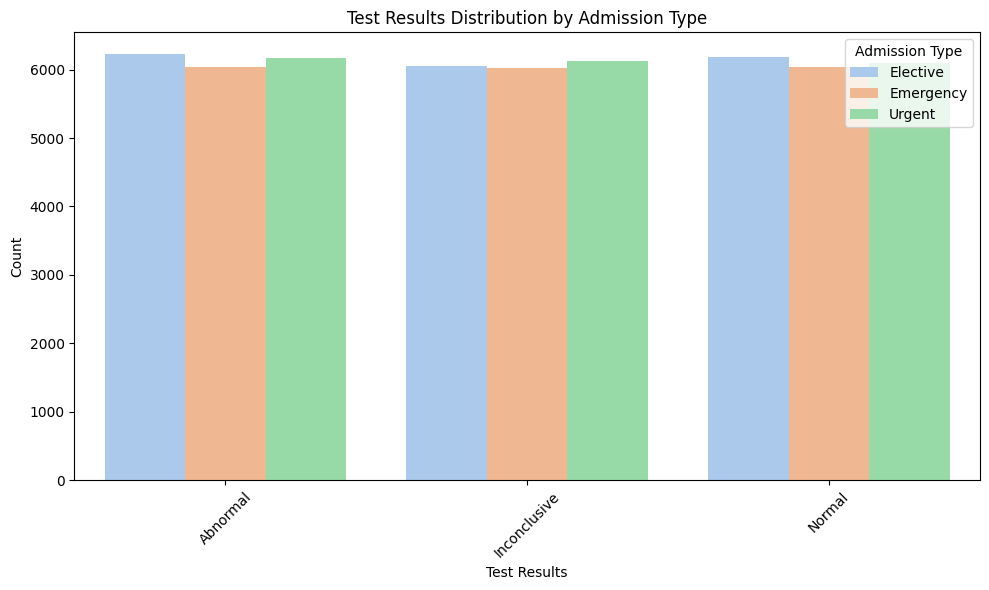

In [56]:
grouped_df = df.groupby(['Test Results', 'Admission Type']).size().reset_index(name='Count')

pastel_palette = sns.color_palette("pastel")

plt.figure(figsize=(10, 6)) 
sns.barplot(data=grouped_df, x='Test Results', y='Count', hue='Admission Type', palette=pastel_palette)

plt.title('Test Results Distribution by Admission Type')
plt.xlabel('Test Results')
plt.ylabel('Count')

plt.legend(title='Admission Type')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\vohoa\AppData\Local\Temp\ipykernel_18800\738972782.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df.groupby(['Medication', 'Gender']).size().reset_index(name='Count')
C:\Users\vohoa\AppData\Local\Temp\ipykernel_18800\738972782.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data=grouped_df, x='Medication', y='Count', hue='Gender', palette=pastel_palette)


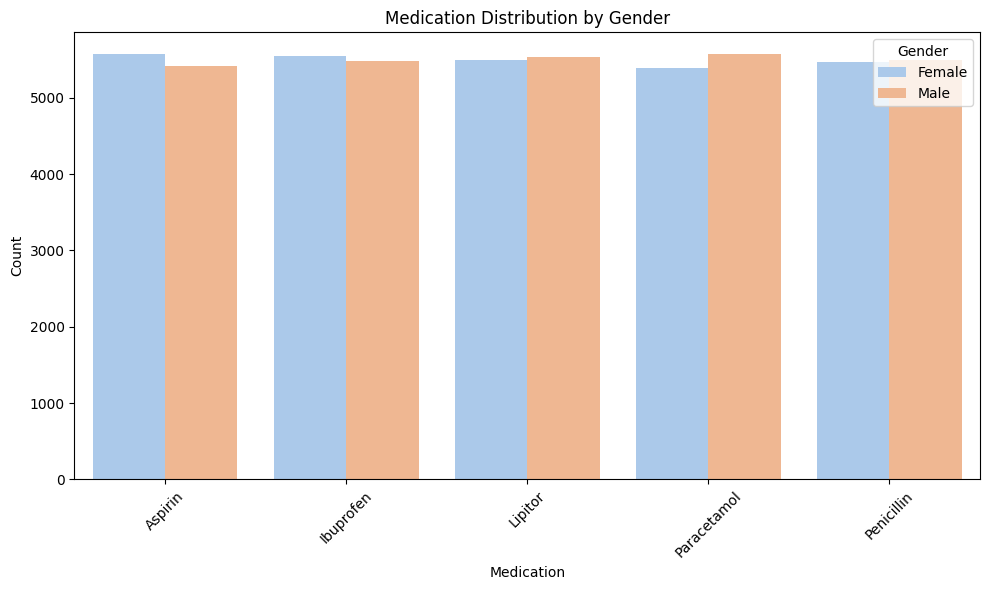

In [57]:
grouped_df = df.groupby(['Medication', 'Gender']).size().reset_index(name='Count')

pastel_palette = sns.color_palette("pastel")

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_df, x='Medication', y='Count', hue='Gender', palette=pastel_palette)

plt.title('Medication Distribution by Gender')
plt.xlabel('Medication')
plt.ylabel('Count')

plt.legend(title='Gender')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Some Questions from Data 

What is the most common blood type among the patients?

In [58]:
most_common_blood_type = df['Blood Type'].value_counts().idxmax()
print(f"The most common blood type among the patients is {most_common_blood_type}.")

The most common blood type among the patients is A-.


How many unique hospitals are included in the dataset?

In [59]:
unique_hospitals = df['Hospital'].nunique()
print(f"There are {unique_hospitals} unique hospitals included in the dataset.")

There are 39876 unique hospitals included in the dataset.


Who is the oldest patient in the dataset, and what is their age?

In [60]:
oldest_patient_age = df['Age'].max()
oldest_patient_name = df[df['Age'] == oldest_patient_age]['Name'].iloc[0]
print(f"The oldest patient in the dataset is {oldest_patient_name} with an age of {oldest_patient_age} years.")

The oldest patient in the dataset is david newton with an age of 89 years.


Which doctor has treated the highest number of patients?

In [61]:
doctor_highest_patient_count = df['Doctor'].value_counts().idxmax()
print(f"The doctor who has treated the highest number of patients is {doctor_highest_patient_count}.")

The doctor who has treated the highest number of patients is michael smith.


What is the most frequently prescribed medication?

In [62]:
most_frequent_medication = df['Medication'].value_counts().idxmax()
print(f"The most frequently prescribed medication is {most_frequent_medication}.")

The most frequently prescribed medication is Lipitor.


Are there any seasonal trends in hospital admissions?

In [63]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])

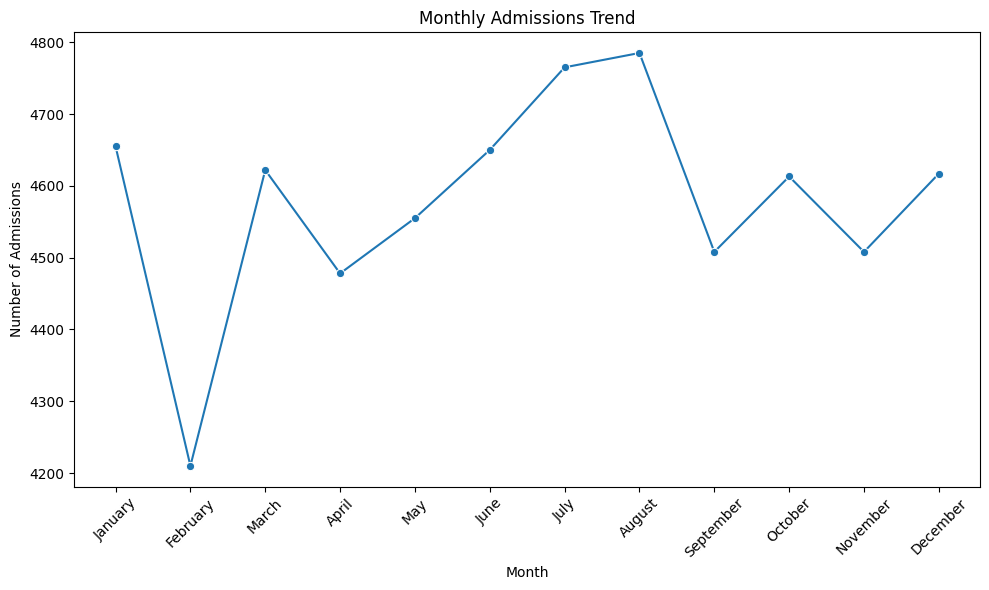

In [64]:
monthly_admissions = df['Date of Admission'].dt.month.value_counts().sort_index()

monthly_admissions_df = pd.DataFrame({'Month': monthly_admissions.index, 'Admissions': monthly_admissions.values})

monthly_admissions_df['Month'] = monthly_admissions_df['Month'].apply(lambda x: 
    pd.to_datetime(str(x), format='%m').strftime('%B'))  # Convert month numbers to names

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_admissions_df, x='Month', y='Admissions', marker='o')

plt.title('Monthly Admissions Trend')
plt.xlabel('Month')
plt.ylabel('Number of Admissions')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

What is the average billing amount for patients?

In [65]:
average_billing_amount = df['Billing Amount'].mean()
print(f"The average billing amount for patients is ${average_billing_amount:.2f}.")

The average billing amount for patients is $25544.31.


How many male and female patients are there?

In [66]:
male_patients = df[df['Gender'] == 'Male'].shape[0]
female_patients = df[df['Gender'] == 'Female'].shape[0]
print(f"There are {male_patients} Male patients and {female_patients} Female patients.")

There are 27496 Male patients and 27470 Female patients.


What are the top three most common medical conditions for which patients are admitted?

In [67]:
top_three_medical_conditions = df['Medical Condition'].value_counts().head(3)
print("Top Three Most Common Medical Conditions:")
print("----------------------------------------")
print(top_three_medical_conditions)

Top Three Most Common Medical Conditions:
----------------------------------------
Medical Condition
Arthritis       9218
Diabetes        9216
Hypertension    9151
Name: count, dtype: int64
